# **Not an ideal network**

**Importing all the needed modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist
#our dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


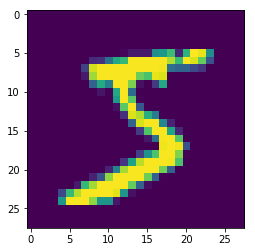

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
#importing activation as well as maxpooling from keras database
from keras.layers import Activation, MaxPooling2D

#The sequential model allows you to create models layer-by-layer.
model = Sequential() 


#input is 28*28 with 1 channel
#3*3, 32 kernels are convoluted
#output is 26*26, with 32 channels
#receptive field is 3*3
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#input is 26*26 with 32 channels
#3*3, 64 kernels are convoluted
#output is 24*24, with 64 channels
#receptive field is 5*5
model.add(Convolution2D(32, 3, 3, activation='relu'))

#input is 24*24 with 64 channels
#3*3, 128 kernels are convoluted
#output is 22*22, with 128 channels
#receptive field is 7*7
model.add(Convolution2D(32, 3, 3, activation='relu'))

#input is 22*22 with 128 channels
#MaxPooling of size 2*2 is done
#output is 11*11, with 128 channels
#receptive field is 14*14
model.add(MaxPooling2D(pool_size=(2, 2)))

#input is 11*11 with 128 channels
#3*3, 256 kernels are convoluted
#output is 09*09, with 256 channels
#receptive field is 16*16
model.add(Convolution2D(64, 3, 3, activation='relu'))

#input is 09*09 with 256 channels
#3*3, 512 kernels are convoluted
#output is 07*07, with 512 channels
#receptive field is 18*18
model.add(Convolution2D(64, 3, 3, activation='relu'))

#input is 07*07 with 512 channels
#3*3, 1024 kernels are convoluted
#output is 05*05, with 1024 channels
#receptive field is 20*20
model.add(Convolution2D(64, 3, 3, activation='relu'))

#input is 05*05 with 1024 channels
#3*3, 2048 kernels are convoluted
#output is 03*03, with 2048 channels
#receptive field is 22*22
model.add(Convolution2D(64, 3, 3, activation='relu'))

#input is 03*03 with 2048 channels
#3*3, 10 kernels are convoluted
#output is 01*01, with 10 channels, giving us the final prediction of a number
#receptive field is 7*7
model.add(Convolution2D(10, 3, 3))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 5, 5, 64)          36928     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.1562 - acc: 0.9508
Epoch 2/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.0492 - acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0384 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0302 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0250 - acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0212 - acc: 0.9934
Epoch 7/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0191 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0139 - acc: 0.9960
Epoch 9/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0156 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 13s 209us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [53]:
print(score)


[0.03886518759441879, 0.9892]


In [0]:
y_pred = model.predict(X_test)

In [55]:
print(y_pred[:9])
print(y_test[:9])

[[2.70302088e-14 1.33072355e-11 1.28749077e-11 1.73205977e-10
  2.88752976e-16 5.52527208e-13 5.77914569e-25 1.00000000e+00
  4.55822310e-16 1.37234624e-09]
 [1.25890453e-11 1.73254449e-11 1.00000000e+00 8.53061535e-15
  2.24003267e-14 5.75659407e-17 1.03689795e-08 1.24686625e-17
  7.56174429e-11 3.26997195e-20]
 [2.59067519e-07 9.99525905e-01 2.64392584e-04 2.14912923e-08
  1.29005948e-05 7.11124740e-05 7.21625355e-08 2.61860787e-05
  9.92647256e-05 3.71969939e-08]
 [9.99974608e-01 1.01985997e-09 3.06131369e-08 1.40313168e-05
  2.87311708e-09 1.04885648e-05 3.67770042e-07 4.01360507e-11
  9.13621290e-10 4.78125287e-07]
 [9.36042875e-17 6.73144735e-18 6.99723160e-15 4.95069148e-19
  1.00000000e+00 8.52808153e-14 4.90774752e-14 3.72520634e-12
  2.20140729e-15 9.00926295e-12]
 [8.47602433e-09 9.99836802e-01 7.14870039e-05 3.40804607e-09
  8.79638628e-06 2.01916973e-05 1.64416780e-09 5.39503635e-05
  8.69000814e-06 7.69404984e-09]
 [2.04888992e-12 3.72358522e-09 3.96664535e-10 2.33034647e